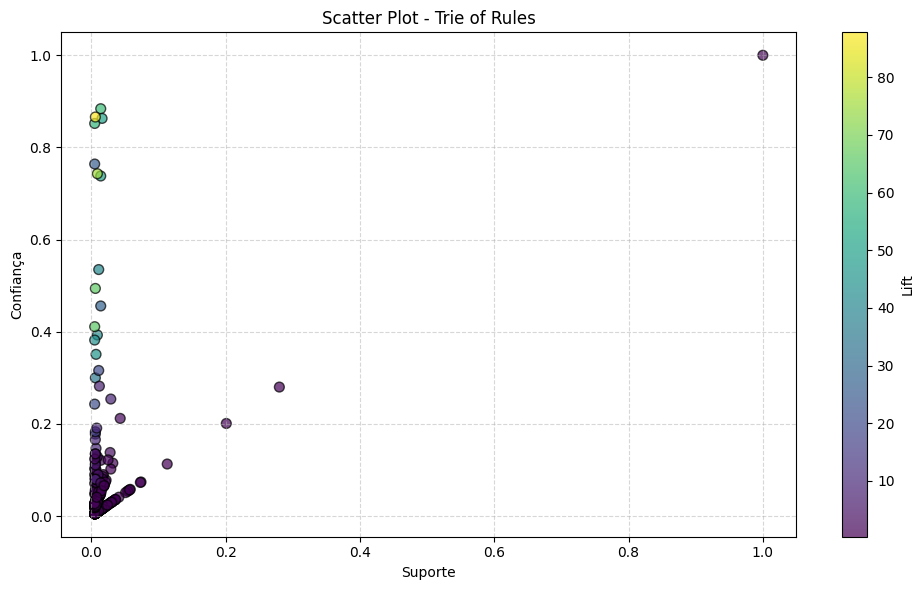

In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

G = nx.read_graphml('outputs/database_2025.graphml')

dados = []
for node, attrs in G.nodes(data=True):
    dados.append({
        'id': node,
        'value': attrs.get('value', ''),
        'support': float(attrs.get('support', 0)),
        'confidence': float(attrs.get('confidence', 0)),
        'lift': float(attrs.get('lift', 0)),
    })

df = pd.DataFrame(dados)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['support'],
    df['confidence'],
    c=df['lift'],
    cmap='viridis',
    s=50,
    alpha=0.7,
    edgecolors='k'
)

plt.colorbar(scatter, label='Lift')
plt.title('Scatter Plot - Trie of Rules')
plt.xlabel('Suporte')
plt.ylabel('Confiança')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# 🔸 Lista dos textos tokenizados
transacoes = [
    ['vacina', 'anvisa', 'liberada'],
    ['vacina', 'pfizer'],
    ['anvisa', '6_meses'],
    ['pfizer', 'dose', 'liberada'],
]

# 🔧 Converter em dataframe no formato que o arulespy aceita
max_itens = max(len(t) for t in transacoes)

data = []
for trans in transacoes:
    linha = {}
    for i, item in enumerate(trans):
        linha[f'item{i+1}'] = item
    data.append(linha)

df_transacoes = pd.DataFrame(data)

print(df_transacoes.head())


    item1    item2     item3
0  vacina   anvisa  liberada
1  vacina   pfizer       NaN
2  anvisa  6_meses       NaN
3  pfizer     dose  liberada


In [ ]:
from arulespy.arules import Transactions, apriori, parameters
from arulespy.arulesViz import plot
from rpy2.ipython.ggplot import image_png

trans = Transactions.from_df(df_transacoes)

rules = apriori(
    trans,
    parameter=parameters({"supp": 0.01, "conf": 0.5}),
    control=parameters({"verbose": False})
)

print(rules.as_df().head())


R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xe3 in position 56: invalid continuation byte <traceback object at 0x00000231FE66D280>


Installing missing R packages. This may take some time.



R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xea in position 20: invalid continuation byte <traceback object at 0x00000231FE600040>


pacote 'fs' desempacotado com sucesso e somas MD5 verificadas
pacote 'rappdirs' desempacotado com sucesso e somas MD5 verificadas
pacote 'sass' desempacotado com sucesso e somas MD5 verificadas
pacote 'sys' desempacotado com sucesso e somas MD5 verificadas
pacote 'evaluate' desempacotado com sucesso e somas MD5 verificadas
pacote 'highr' desempacotado com sucesso e somas MD5 verificadas
pacote 'xfun' desempacotado com sucesso e somas MD5 verificadas
pacote 'bslib' desempacotado com sucesso e somas MD5 verificadas
pacote 'fontawesome' desempacotado com sucesso e somas MD5 verificadas
pacote 'tinytex' desempacotado com sucesso e somas MD5 verificadas
pacote 'askpass' desempacotado com sucesso e somas MD5 verificadas
pacote 'iterators' desempacotado com sucesso e somas MD5 verificadas
pacote 'permute' desempacotado com sucesso e somas MD5 verificadas
pacote 'zoo' desempacotado com sucesso e somas MD5 verificadas
pacote 'farver' desempacotado com sucesso e somas MD5 verificadas
pacote 'lab

c:\Users\luiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\rpy2\robjects\lib\ggplot2.py:76: UserWarning: This was designed against ggplot2 versions starting with 3.5. but you have 3.5.2.
  warnings.warn(
c:\Users\luiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


              LHS               RHS  support  confidence  coverage  lift  \
1              {}    {item1=vacina}     0.50         0.5      1.00   1.0   
2              {}  {item3=liberada}     0.50         0.5      1.00   1.0   
3  {item2=pfizer}    {item1=vacina}     0.25         1.0      0.25   2.0   
4  {item1=vacina}    {item2=pfizer}     0.25         0.5      0.50   2.0   
5  {item1=anvisa}   {item2=6_meses}     0.25         1.0      0.25   4.0   

   count  
1      2  
2      2  
3      1  
4      1  
5      1  


R callback write-console: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.
  


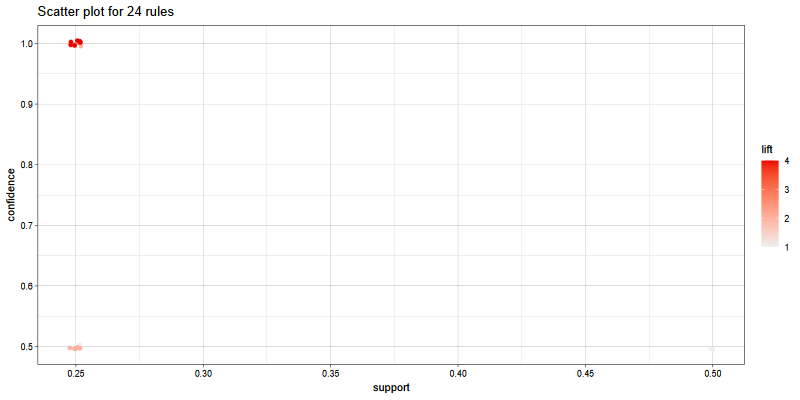

In [11]:
from arulespy.arulesViz import plot
from rpy2.ipython.ggplot import image_png

gg = plot(rules, method="scatter") 
image_png(gg)

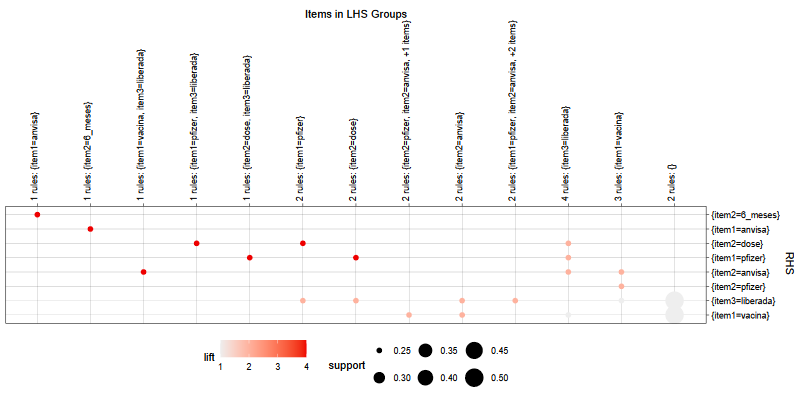

In [12]:
gg = plot(rules, method="grouped") 
image_png(gg)

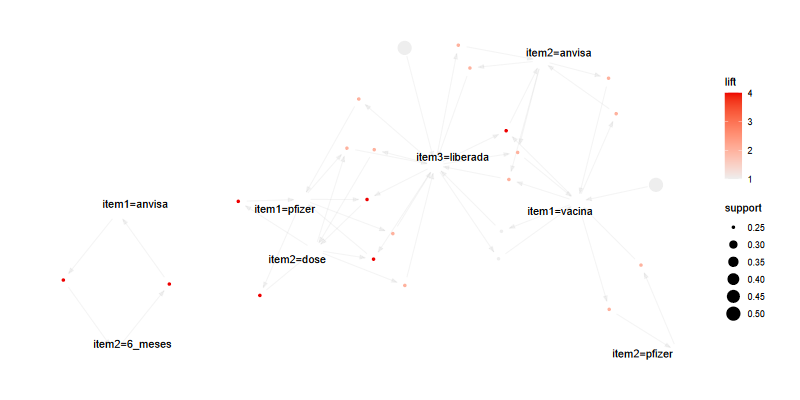

In [13]:
gg = plot(rules, method="graph") 
image_png(gg)